In [1]:
import pandas as pd
import numpy as np

In [2]:
def load_xls_to_pandas(filepath , sheet_name):
    xls = pd.ExcelFile(filepath)
    df = pd.read_excel(xls, sheet_name)
    df.columns = df.iloc[1]
    # remove row 1 and 2
    df = df.iloc[2:]
    return df

df_raw = load_xls_to_pandas('data/hp_retro_data.xls', 'Discretized Data (Final)')
df_raw.head(10)

1,NUMBER,SEX,TEMP,HEART_RATE,AGE,PREV_VISIT,HX_TRAUMA,COMPLAINT_SITE,HX_ILLNESS,GAIT_REPORTED,...,GAIT_OBSERVED,PAIN_ROM_HIP,OTHER_PAIN_SITE,PAIN_PALPATION,SWELLING,CURRENT_ILLNESS,PREV_PROBLEMS,WBC,ESR,TRIAGE
2,1,FEMALE,?,GE80_LT120,GE6Y,?,NO,HIP,NO,NOT_WT_BEAR,...,?,YES,?,TENDER,NO,NO,NO,?,?,DISCHARGE
3,3,FEMALE,LT38,GE120,LT6Y,?,NO,LEG,NO,?,...,?,YES,NO,?,?,NO,NO,?,?,DISCHARGE
4,4,MALE,LT38,?,GE6Y,?,?,HIP,NO,?,...,LIMP,YES,NO,?,NO,YES,?,?,?,DISCHARGE
5,5,MALE,LT38,GE80_LT120,GE6Y,?,YES,HIP,?,?,...,NORMAL,YES,?,NORMAL,NO,NO,?,?,?,DISCHARGE
6,7,FEMALE,?,GE80_LT120,GE6Y,?,YES,HIP,?,?,...,NOT_WT_BEAR,?,LEG,?,NO,?,NO,?,?,DISCHARGE
7,8,FEMALE,LT38,GE80_LT120,GE6Y,?,NO,HIP,NO,NORMAL,...,NORMAL,YES,NO,NORMAL,?,NO,?,?,?,DISCHARGE
8,10,MALE,LT38,GE80_LT120,GE6Y,YES,NO,HIP,YES,NOT_WT_BEAR,...,?,YES,?,TENDER,NO,YES,YES,?,?,DISCHARGE
9,11,MALE,LT38,GE40_LT80,GE6Y,?,YES,HIP,NO,LIMP,...,?,NO,PELVIS,NORMAL,NO,NO,NO,?,?,DISCHARGE
10,14,MALE,LT38,GE80_LT120,GE6Y,YES,?,HIP,NO,LIMP,...,?,?,?,?,?,?,?,?,?,DISCHARGE
11,15,MALE,LT38,GE80_LT120,GE6Y,?,YES,HIP,NO,?,...,?,YES,?,TENDER,NO,NO,YES,?,?,DISCHARGE


In [15]:
# num_cols = ["TEMP", "HEART_RATE", "AGE", "DURATION", "WBC", "ESR"]
# cat_cols = ["SEX", "PREV_VISIT", "HX_TRAUMA", "COMPLAINT_SITE", "HX_ILLNESS",
#             "GAIT_REPORTED", "APPEARANCE", "HIP_REST", "HIP_ROM", "HIP_INT_ROT",
#             "HIP_INT_ROT", "HIP_FLEXION", "GAIT_OBSERVED", "PAIN_ROM_HIP", "OTHER_PAIN_SITE",
#             "PAIN_PALPATION", "SWELLING", "CURRENT_ILLNESS", "PREV_PROBLEMS"]

cat_bins = {
        "TRIAGE": {"DISCHARGE": 0, "XRAY": 0, "LAB_XRAY_BSCAN": 1},
        "OTHER_PAIN_SITE": {np.nan: 0, 'NO': 1, 'OTHER': 2,
                            'PELVIS': 3,'BACK': 4, 'LEG': 5},
        }

def preproc_df(df):
    df = df.replace('?', np.nan)
    # df[num_cols] = df[num_cols].apply(pd.to_numeric)
    print(df.isnull().sum())
    df = df.dropna(axis=1, thresh=200)
    # create maps for all variables
    for col in set(df.columns) - set(["NUMBER", "TRIAGE"]):
        if col not in cat_bins:
            if np.nan in list(df[col].unique()):
                vals = [np.nan] + list(set(df[col].unique()) - {np.nan})
            else:
                vals = list(set(df[col].unique()))
            cat_bins[col] = {k: v for v, k in enumerate(vals)}

    # map categorical variables using cat_bins
    for col in df.columns:
        if col in cat_bins:
            df[col] = df[col].map(cat_bins[col])

    # encode categorical variables
    # print number of different variables in categorical columns

    # encode nans as a new category
    return df

df = preproc_df(df_raw.copy(deep=True))
df.head(10)

1
NUMBER               0
SEX                  0
TEMP                80
HEART_RATE          27
AGE                  0
PREV_VISIT         279
HX_TRAUMA           94
COMPLAINT_SITE       7
HX_ILLNESS          45
GAIT_REPORTED       56
DURATION            11
APPEARANCE          79
HIP_REST           339
HIP_ROM             37
HIP_INT_ROT         71
HIP_FLEXION         81
GAIT_OBSERVED      122
PAIN_ROM_HIP        80
OTHER_PAIN_SITE    119
PAIN_PALPATION     120
SWELLING           150
CURRENT_ILLNESS     51
PREV_PROBLEMS      122
WBC                241
ESR                250
TRIAGE               0
dtype: int64


/tmp/ipykernel_4862/366013094.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('?', np.nan)


1,NUMBER,SEX,TEMP,HEART_RATE,AGE,HX_TRAUMA,COMPLAINT_SITE,HX_ILLNESS,GAIT_REPORTED,DURATION,...,HIP_INT_ROT,HIP_FLEXION,GAIT_OBSERVED,PAIN_ROM_HIP,OTHER_PAIN_SITE,PAIN_PALPATION,SWELLING,CURRENT_ILLNESS,PREV_PROBLEMS,TRIAGE
2,1,0,0,3,0,2,4,2,2,3,...,2,1,0,1,0,2,2,2,2,0
3,3,0,2,1,1,2,3,2,0,3,...,1,1,0,1,1,0,0,2,2,0
4,4,1,2,0,0,0,4,2,0,1,...,2,2,3,1,1,0,2,1,0,0
5,5,1,2,3,0,1,4,0,0,2,...,0,0,1,1,0,1,2,2,0,0
6,7,0,0,3,0,1,4,0,0,2,...,1,2,2,0,5,0,2,0,2,0
7,8,0,2,3,0,2,4,2,1,1,...,1,1,1,1,1,1,0,2,0,0
8,10,1,2,3,0,2,4,1,2,3,...,0,0,0,1,0,2,2,1,1,0
9,11,1,2,2,0,1,4,2,3,1,...,1,1,0,2,3,1,2,2,2,0
10,14,1,2,3,0,0,4,2,3,3,...,2,2,0,0,0,0,0,0,0,0
11,15,1,2,3,0,1,4,2,0,2,...,1,1,0,1,0,2,2,2,1,0


In [4]:
# count unique in TRIAGE
triage_counts = df['TRIAGE'].value_counts()
print(triage_counts)
print("Percent of lab_xray_bscan:")
print(triage_counts['LAB_XRAY_BSCAN'] / triage_counts.sum())

TRIAGE
DISCHARGE         312
XRAY               54
LAB_XRAY_BSCAN     46
Name: count, dtype: int64
Percent of lab_xray_bscan:
0.11165048543689321


In [5]:
df.describe()

1,NUMBER
count,412.000000
mean,207.410194
std,119.220417
min,1.000000
25%,104.750000
50%,207.500000
75%,310.250000
max,413.000000


In [6]:
print(df.shape)
df.isna().sum()

(412, 22)


1
NUMBER               0
SEX                  0
TEMP                80
HEART_RATE          27
AGE                  0
HX_TRAUMA           94
COMPLAINT_SITE       7
HX_ILLNESS          45
GAIT_REPORTED       56
DURATION            11
APPEARANCE          79
HIP_ROM             37
HIP_INT_ROT         71
HIP_FLEXION         81
GAIT_OBSERVED      122
PAIN_ROM_HIP        80
OTHER_PAIN_SITE    119
PAIN_PALPATION     120
SWELLING           150
CURRENT_ILLNESS     51
PREV_PROBLEMS      122
TRIAGE               0
dtype: int64

## Supersample, split, encode and k-fold

In [89]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

X = df.drop(columns=['NUMBER', 'TRIAGE'])
y = df['TRIAGE']

print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

# split
X_res, X_test, y_res, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
print('Train and test datasets shape %s' % Counter(y_res), Counter(y_test))

encoder = OneHotEncoder()
X, y = encoder.fit_transform(X.values), y.values
X_res, X_test  = encoder.transform(X_res.values), encoder.transform(X_test.values)
y_res, y_test = y_res.values, y_test.values

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)


Original dataset shape Counter({0: 366, 1: 46})
Resampled dataset shape Counter({0: 366, 1: 366})
Train and test datasets shape Counter({1: 300, 0: 285}) Counter({0: 81, 1: 66})


## Model

### random forest classifier

In [91]:
print(X.shape, X_res.shape, X_test.shape)

(412, 67) (585, 67) (147, 67)


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Create a RandomForestClassifier instance
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

kfold_results = []
for train_index, val_index in kf.split(X_res):
    result = {}
    X_train, X_val = X_res[train_index], X_res[val_index]
    y_train, y_val = y_res[train_index], y_res[val_index]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_val)
    
    result['roc_auc'] = roc_auc_score(y_val, y_pred)
    result['conf_matrix'] = confusion_matrix(y_val, y_pred)
    result['model'] = classifier
    kfold_results.append(result)


best_result = max(kfold_results, key=lambda x: x['roc_auc'])

print("Best model ROC AUC: ", best_result['roc_auc'])
print("Best model conf matrix on val data: \n", best_result['conf_matrix'])

y_pred = best_result['model'].predict(X)
conf = confusion_matrix(y, y_pred)
print("Conf matrix on all data: \n", conf)

y_pred = best_result['model'].predict(X_test)
conf = confusion_matrix(y_test, y_pred)
print("Conf matrix on test data: \n", conf)


Best model ROC AUC:  0.9915254237288136
Best model conf matrix on val data: 
 [[58  0]
 [ 1 58]]
Conf matrix on all data: 
 [[358   8]
 [  3  43]]
Conf matrix on test data: 
 [[75  6]
 [ 2 64]]


## WIP from here

In [80]:
# add parametrization
from sklearn.model_selection import GridSearchCV

cls = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [250, 500, 750, 1000],
    'max_depth': [None, 2, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6]
}

# Instantiate a GridSearchCV classifier with 5-fold cross-validation
# and record the AUPRC and AUROC scores
grid_search = GridSearchCV(estimator=cls, param_grid=param_grid,
                            cv=kf, scoring='roc_auc', verbose=1,
                            n_jobs=-1, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X, y)
print(grid_search.best_params_)
print(grid_search.best_score_)

print("Evalueate on test data")
y_pred = grid_search.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.matshow(conf_matrix, cmap='Blues')

for (i, j), val in np.ndenumerate(conf_matrix):
    plt.text(j, i, f'{val:.0f}', ha='center', va='center')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 250}
0.9005334756567633
Evalueate on test data


ValueError: X has 66 features, but RandomForestClassifier is expecting 67 features as input.

In [62]:
# add parametrization and more classifiers
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


Fitting 5 folds for each of 192 candidates, totalling 960 fits
{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 200}
0.8757658186562297


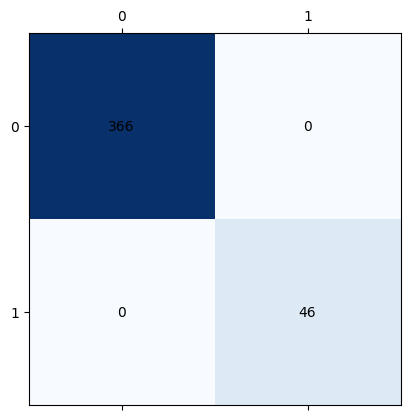

In [65]:
# Gradient Boosting Classifier
cls = GradientBoostingClassifier(random_state=42)

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [200, 400, 600, 800],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [2, 4, 6, 8]
}

# Instantiate a GridSearchCV classifier with 5-fold cross-validation
# and record the AUPRC and AUROC scores
grid_search = GridSearchCV(estimator=cls, param_grid=param_grid,
                            cv=kf, scoring='roc_auc', verbose=1,
                            n_jobs=-1, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X, y)
print(grid_search.best_params_)
print(grid_search.best_score_)
# print(grid_search.cv_results_['mean_test_score'])

y_pred = grid_search.predict(X)
conf_matrix = confusion_matrix(y, y_pred)
plt.matshow(conf_matrix, cmap='Blues')

for (i, j), val in np.ndenumerate(conf_matrix):
    plt.text(j, i, f'{val:.0f}', ha='center', va='center')

In [31]:
# MLP Classifier
cls = MLPClassifier(random_state=42)

# Define the grid of hyperparameters
param_grid = {
    'hidden_layer_sizes': [(20,), (30,), (40,), (50,), (60,), (70,), (80,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Instantiate a GridSearchCV classifier with 5-fold cross-validation
grid_search = GridSearchCV(estimator=cls, param_grid=param_grid,
                            cv=kf, scoring='roc_auc', verbose=1,
                            n_jobs=-1, return_train_score=True)
# Fit the grid search to the data
grid_search.fit(X, y)
print(grid_search.best_params_)
print(grid_search.best_score_)

y_pred = grid_search.predict(X)
conf_matrix = confusion_matrix(y, y_pred)
plt.matshow(conf_matrix, cmap='Blues')

for (i, j), val in np.ndenumerate(conf_matrix):
    plt.text(j, i, f'{val:.0f}', ha='center', va='center')

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/home/alex/Repos/BIO/projekt-1/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alex/Repos/BIO/projekt-1/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alex/Repos/BIO/projekt-1/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alex/Repos/BIO/projekt-1/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged ye

{'activation': 'logistic', 'alpha': 0.0005, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.8009403467528651


/home/alex/Repos/BIO/projekt-1/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
# AUROC and AUPRC
from sklearn.metrics import roc_auc_score, average_precision_score

# calculate roc auc
y_pred = grid_search.predict(X)
roc_auc = roc_auc_score(y, y_pred)
print(f'ROC AUC: {roc_auc}')

# calculate average precision
average_precision = average_precision_score(y, y_pred)
print(f'Average Precision: {average_precision}')


ValueError: could not convert string to float: 'DISCHARGE'

In [12]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# calculate confusion matrix
conf_matrix = confusion_matrix(y, y_pred)


ModuleNotFoundError: No module named 'seaborn'